<a href="https://colab.research.google.com/github/sarthakpruthi/deep-learning-fastai/blob/master/Bears_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from fastai.vision import *

Data is scraped from google and then uploaded here.

In [ ]:
folder = 'black'
file = 'black.txt'
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(file, dest, max_pics=200)

In [ ]:
folder = 'teddys'
file = 'teddy.txt'
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(file, dest, max_pics=200)

In [ ]:
folder = 'grizzly'
file = 'grizzly.txt'
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(file, dest, max_pics=200)

In [ ]:
path.ls()

[PosixPath('data/bears/teddys'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/grizzly')]

# **Download Images**

In [ ]:
classes = ['teddys','grizzly','black']

In [ ]:
#download_images(file, dest, max_pics=200)

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


grizzly


black


# **View Data**

In [ ]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['black', 'grizzly', 'teddys']

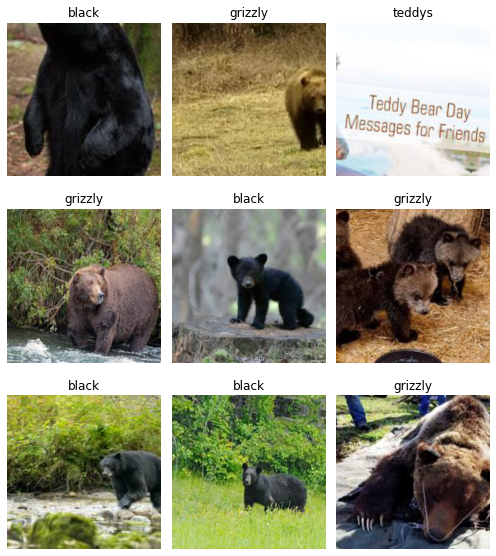

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 480, 120)

# **Training Data**

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.723211,0.156919,0.025000,00:08
1,0.397845,0.167521,0.033333,00:06
2,0.280825,0.141123,0.033333,00:06
3,0.218680,0.140090,0.033333,00:06


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


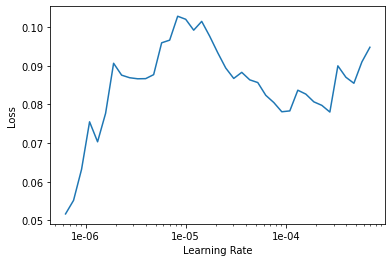

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,8e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.033057,0.210656,0.025000,00:07
1,0.024864,0.203337,0.033333,00:07


# **Interpretation**

In [ ]:
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

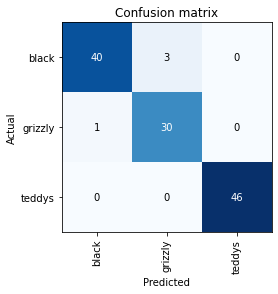

In [ ]:
interp.plot_confusion_matrix()


# **Cleaning Data**

In [ ]:
from fastai.widgets import *

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
# Creating new learner
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())